
# Tutorial 7a: Chọn lọc đặc trưng 

----

## Biến đổi (transformers)
Các tác vụ này được thực hiện bằng cách sử dụng **transformers**

"transformer" của sklearn được sử dụng cho việc này, các phương thức chính là:
- transformer.fit()
- transformer.transform()
- transformer.fit_transform()

Lưu ý rằng việc phân tích và điều chỉnh (huấn luyện) chỉ dựa trên tập dữ liệu huấn luyện. Sau đó, các phép biến đổi đã học được sẽ được áp dụng cho dữ liệu kiểm tra.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dữ liệu

In [38]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
# Tách biến 
X=df[df.columns[1:-1]]  
y=df[df.columns[-1]]

In [40]:
# Đếm dữ liệu mẫu
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [41]:
# Chia dữ liệu ra 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [42]:
# Kiểm tra dữ liệu sau khi tách
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


## **PCA (Giảm chiều)**

### Chuẩn hóa dữ liệu

PCA có tác dụng với việc chuẩn hóa: ta có thể đưa mõi đặc trưng trong dữ liệu để đưa về giá trị đơn giản (mean = 0 và độ lệc chuẩn = 1) trước khi PCA. Sử dụng hàm StandardScaler để chuẩn hóa các đặc trung trong tập dữ liệu

In [43]:
# Bây giờ áp dụng 1-1 "StandardScaler"
#1) Khai báo thư viện
from sklearn.preprocessing import StandardScaler

#2) Định nghĩa mô hình
scaler=StandardScaler()

#3) Fit mô hình
scaler.fit(X_train)

#4) Biến đổi dữ liệu
X_train_ss = scaler.transform(X_train)

# Lưu ý 3 và 4 có thể đưcọ thực hiện như dưới:
# X_train_ss = SS.fit_transform(X_train)

### Chạy PCA

In [44]:
# Chạy PCA
# Bước thực hiện giống với Chuẩn hóa dữ liệu
#1) Khai báo thư viện
from sklearn.decomposition import PCA
#2) define the model
pca = PCA(n_components=2)   # n_components means the pca transformation constructs this many features
#3) fit the model
pca.fit(X_train_ss)
#4) transform the data
pca_train = pca.transform(X_train_ss)
# 3 and 4 could be combined
# pca_train = pca.fit_transform(X_train_ss)
# print the output, which is a matrix of only two features
pca_train[:10,:]
# ALT: plt.scatter(pca_train[:,0],pca_train[:,1])

array([[ 0.09953905, -1.27195338],
       [ 1.24517682, -1.511778  ],
       [-2.23995982,  0.82850939],
       [ 1.56980436,  1.02026044],
       [ 0.41457825, -0.43457392],
       [ 1.48337778,  0.51976305],
       [-1.80491446, -0.66531921],
       [-2.2865126 ,  0.80241998],
       [-1.58636569, -1.04325442],
       [ 1.57485976,  0.53649337]])

### Trực quan hóa kết quả

Khả năng xảy ra thứ 2

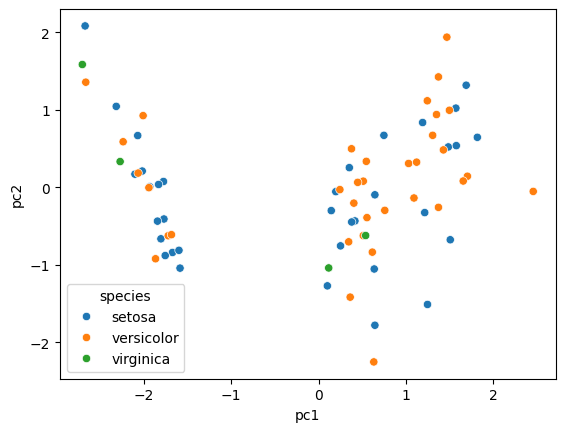

In [45]:
# Chuẩn hóa và trực quan trên tập dữ liệu huấn luyện
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

### Thực hiện biến đổi trên tập dữ liệu test

Lưu ý rằng ta chỉ có thể áp dụng phương thức học để biến đổi trên dữ liệu test, không fit để sử dụng


In [46]:
#1- Thực hiện áp dụng chuẩn hóa dữ liệu trên tập test
X_test_ss = scaler.transform(X_test)
#2- Thực hiện PCA sử dùng trong tập train để áp dụng cho tập test
pca_test = pca.transform(X_test_ss)

### Phân loại

In [47]:
# Thực hiện phân loại dựa trên dữ liệu gốc
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
#classifier=SVC()
classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Accuracy before transformation  = {:.2f}'.format(score))

Accuracy before transformation  = 0.91


In [48]:
# Thực hiện phân loại dựa trên dữ liệu đã pca
classifier.fit(pca_train, y_train)
score = accuracy_score(classifier.predict(pca_test), y_test)
print('Accuracy after PCA transformation  = {:.2f}'.format(score))

Accuracy after PCA transformation  = 0.93


## ICA

Các bước thực hiện giống với việc chuẩn hóa và PCA Sử dụng Fast ICA thuật toán

In [49]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)  # Thực hiện lại các bước giống với PCA

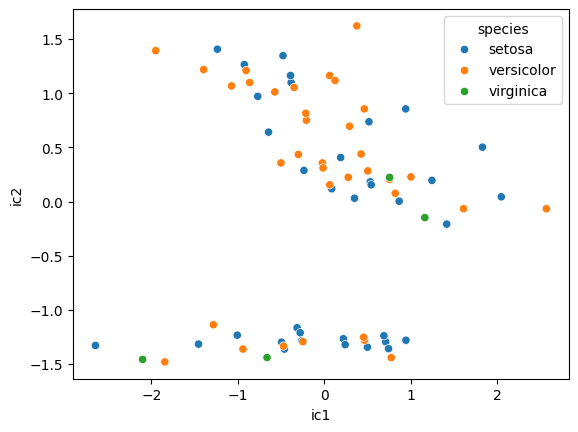

In [50]:
# Trực quan hóa
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

In [51]:
# Thực hiện phân loại dựa trên dữ liệu đã ica
# Thực hiện biến đổi ica trên tập test
classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.93


## GP transformers

In [52]:
# Không hoạt động trên dữ liệu String nên chuyển chúng về đúng dạng (Encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [53]:
# Cài đặt package genetic programming (gp)
import sys
!{sys.executable} -m pip install gplearn


'c:\Users\MSI' is not recognized as an internal or external command,
operable program or batch file.


---
